<a href="https://colab.research.google.com/github/emadphysics/Amsterdam_Airbnb_predictive_models/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from math import sqrt
import os
from sklearn.neighbors import LocalOutlierFactor


from sklearn.metrics import *
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.isotonic import isotonic_regression
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.neighbors  import *
from sklearn.gaussian_process import *
from sklearn.ensemble import *
from sklearn.experimental import *
from sklearn.neural_network import *
from sklearn.tree import *
from xgboost import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from geopy.distance import great_circle
import folium
from folium.plugins import HeatMap
from collections import Counter
from sklearn.linear_model import Lasso
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/listingss.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
one_hot_col_names = ['host_id',  'host_location', 'host_response_time','host_is_superhost','host_neighbourhood','host_has_profile_pic','host_identity_verified',
           'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed', 'zipcode', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'has_availability', 'requires_license', 'instant_bookable', 
           'is_business_travel_ready', 'cancellation_policy', 'cancellation_policy','require_guest_profile_picture', 'require_guest_phone_verification', 'calendar_updated']

features = ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 
      'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet',     
      'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 
      'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
      'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']
 
price_features = ['security_deposit', 'cleaning_fee', 'extra_people','price'] 

text_cols = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_about']

date_cols = ['host_since', 'first_review', 'last_review']

In [ ]:
import sklearn
import io
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from sklearn import linear_model
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.utils import shuffle
from datetime import date

In [ ]:
def one_hot(arr):
    
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(arr)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [ ]:
def host_verification(cols):
    possible_words = {}
    i = 0
    for col in cols:
        words = col.split()
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '' and wr not in possible_words:
                possible_words[wr] = i
                i += 1
    print (possible_words)
    l = len(possible_words)

    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split()
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[possible_words[wr]] = 1
        new_cols[i] = arr
    return new_cols

In [ ]:
def amenities(cols):
    dic = {}
    i = 0
    for col in cols:
        arr = col.split(',')
        for a in arr:
            ar = re.sub(r'\W+', '', a)
            if len(ar) > 0:
                if ar not in dic:
                    dic[ar] = i
                    i += 1
    
    l = len(dic)
    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split(',')
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[dic[wr]] = 1
        new_cols[i] = arr
    return new_cols


In [ ]:
def clean_date(cols):
    num_data = cols.shape[0]
    #print(num_data)
    dates = pd.to_datetime(cols)
    min_date = pd.to_datetime(date.today())
    for col in dates:
        if not isinstance(col, float):
            min_date = min(min_date, col)
    mean_date = dates.mean()
    
    dif = pd.to_timedelta([mean_date - min_date]).astype('timedelta64[h]')[0]
    arr = np.zeros((num_data, 1))
    #print (dif)
    for i, col in enumerate(dates):
        arr[i] = pd.to_timedelta([col - min_date]).astype('timedelta64[h]')[0]
        if np.isnan(arr[i]):
            arr[i] = dif

    # print (np.min(arr), np.max(arr))
    return arr

In [ ]:
date_features = []
for i in date_cols:
    date_features.append(clean_date(df[i]))

date_features = np.concatenate(date_features, axis=1)

In [ ]:
one_hot_col_names = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
           'neighbourhood_cleansed','neighbourhood_group_cleansed', 'zipcode', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'has_availability', 'requires_license', 'instant_bookable', 
           'is_business_travel_ready', 'cancellation_policy', 'cancellation_policy','require_guest_profile_picture', 'require_guest_phone_verification','calendar_updated']
one_hot_dict = {}
for i in one_hot_col_names:
    #print(i)
    one_hot_dict[i] = one_hot(np.array(df[i].fillna(""), dtype=str))
one_hot_dict['host_verifications'] = host_verification(df['host_verifications'])
one_hot_dict['amenities'] = amenities(df['amenities'])

{'email': 0, 'phone': 1, 'reviews': 2, 'jumio': 3, 'offline_government_id': 4, 'selfie': 5, 'government_id': 6, 'identity_manual': 7, 'facebook': 8, 'work_email': 9, 'google': 10, 'manual_offline': 11, 'manual_online': 12, 'sent_id': 13, 'kba': 14, 'None': 15, 'weibo': 16, 'zhima_selfie': 17, 'sesame': 18, 'sesame_offline': 19}


In [ ]:
ont_hot_list = []

for i in one_hot_dict.keys():
    if 1<one_hot_dict[i].shape[1]<400:
        
        ont_hot_list.append(one_hot_dict[i])
        print(i,one_hot_dict[i].shape[1])

onehot_features = np.concatenate(ont_hot_list, axis=1)
print(onehot_features.shape)

host_response_time 5
host_is_superhost 3
host_has_profile_pic 3
host_identity_verified 3
neighbourhood_cleansed 22
is_location_exact 2
property_type 34
room_type 4
bed_type 5
instant_bookable 2
cancellation_policy 5
require_guest_profile_picture 2
require_guest_phone_verification 2
calendar_updated 79
host_verifications 20
amenities 134
(20001, 325)


In [ ]:
def clean_host_response_rate(host_response_rate, num_data):
    total = 0
    count = 0
    for col in host_response_rate:
        if not isinstance(col, float):
            total += float(col.strip('%'))
            count += 1

    arr = np.zeros(num_data)
    mean = total / count
    print (host_response_rate.name, 'mean is ', mean)
    for i, col in enumerate(host_response_rate):
        if not isinstance(col, float):
            arr[i] += float(col.strip('%'))
        else:
            assert(math.isnan(col))
            arr[i] = mean
    return arr

In [ ]:
def clean_price(price, num_data):
    '''
    total = 0
    count = 0
    all_count=0
    for col in price:
        all_count+=1
        if not isinstance(col, float):
            total += float(col.strip('$').replace(',', ''))
            count += 1
    
    
    mean = total / count
    print (price.name, 'mean is ', mean)
    print(all_count-count)
    '''
    arr = np.zeros(num_data)
    for i, col in enumerate(price):
        if not isinstance(col, float):
            arr[i] += float(col.strip('$').replace(',', ''))
        else:
            assert(math.isnan(col))
            arr[i] = 0
    return arr

In [ ]:
def check_nan(cols):
    for col in cols:
        #print (col)
        if np.isnan(col):
            return True
    return False

In [ ]:
def to_np_array_fill_NA_mean(cols):
    print (cols.name, 'mean is ', np.nanmean(np.array(cols)))
    return np.array(cols.fillna(np.nanmean(np.array(cols))))

In [ ]:
num_data = df.shape[0]

In [ ]:
arr = np.zeros((len(features) + len(price_features) + 1, num_data))
# check_nan(df['extra_people'])

host_response_rate = clean_host_response_rate(df['host_response_rate'], num_data)
arr[0] = host_response_rate
print("num_data", num_data)
i = 0
for feature in features:
    i += 1
    if check_nan(df[feature]):
        arr[i] = to_np_array_fill_NA_mean(df[feature])
    else:
        arr[i] = np.array(df[feature])
    

for feature in price_features:
    i += 1
    arr[i] = clean_price(df[feature], num_data)

label = arr[-1]
arr = arr[:-1].T
#arr = arr.T
print(arr.shape)

host_response_rate mean is  93.11117494972709
num_data 20001
host_listings_count mean is  3.877587849014988
host_total_listings_count mean is  3.877587849014988
bathrooms mean is  1.1829707426856715
bedrooms mean is  1.4510834209077716
beds mean is  1.7806160781367393
square_feet mean is  548.3960674157304
review_scores_rating mean is  95.25180963237389
review_scores_accuracy mean is  9.710220143720772
review_scores_cleanliness mean is  9.487482178500143
review_scores_checkin mean is  9.77022709117882
review_scores_communication mean is  9.810539523212045
review_scores_location mean is  9.50872889091739
review_scores_value mean is  9.205100410771337
reviews_per_month mean is  0.9533010637699104
(20001, 30)


In [ ]:
price_thres = 500

In [ ]:
count_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2))
#count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1))

text_X_list=[]
#text_cols = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_about']
for i in text_cols:
    print(i)
    mask = label > 0#np.logical_and(label<price_thres, label > 0) #
    x = count_vect.fit_transform(df[i][mask].values.astype('U'))
    pca = TruncatedSVD(n_components=50)#x.shape[1]//100) #PCA(n_components=10)
    x = pca.fit_transform(x)
    print(x.shape)
    text_X_list.append(x)
from scipy.sparse import hstack
text_features_unfiltered = np.concatenate(text_X_list,axis=1)#PCA 
#text_features = hstack(text_X_list) #non-PCA

name
(20000, 50)
summary
(20000, 50)
space
(20000, 50)
description
(20000, 50)
neighborhood_overview
(20000, 50)
notes
(20000, 50)
transit
(20000, 50)
access
(20000, 50)
interaction
(20000, 50)
house_rules
(20000, 50)
host_name
(20000, 50)
host_about
(20000, 50)


Iteration 1, loss = 0.61920458
Validation score: 0.153573
Iteration 2, loss = 0.09234144
Validation score: 0.288897
Iteration 3, loss = 0.08182253
Validation score: 0.343832
Iteration 4, loss = 0.07567829
Validation score: 0.391806
Iteration 5, loss = 0.07154877
Validation score: 0.419114
Iteration 6, loss = 0.06862163
Validation score: 0.436732
Iteration 7, loss = 0.06629166
Validation score: 0.456802
Iteration 8, loss = 0.06463675
Validation score: 0.464608
Iteration 9, loss = 0.06304980
Validation score: 0.477852
Iteration 10, loss = 0.06182900
Validation score: 0.483969
Iteration 11, loss = 0.06075295
Validation score: 0.492130
Iteration 12, loss = 0.05992275
Validation score: 0.493390
Iteration 13, loss = 0.05911029
Validation score: 0.500209
Iteration 14, loss = 0.05849082
Validation score: 0.508849
Iteration 15, loss = 0.05783419
Validation score: 0.504646
Iteration 16, loss = 0.05721712
Validation score: 0.501856
Iteration 17, loss = 0.05682658
Validation score: 0.509397
Iterat

Text(0, 0.5, 'Predicted label')

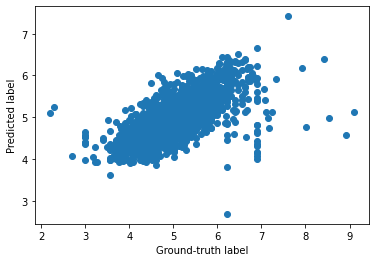

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
mask = label > 0 #np.logical_and(label<price_thres, label > 0) #label > 0
# mask = np.logical_and(label<price_thres, label > 0) #label > 0

arr_filtered = (arr[mask])
one_hot_filtered = onehot_features[mask]
#date_filtered = date_features[mask]   

num_data = arr_filtered.shape[0]
train_num = int(num_data * 0.7)
dev_num = int(num_data * 0.9)
test_num = num_data - train_num

label_filtered =np.log(label[mask])

train_label = label_filtered[:train_num]
dev_label = label_filtered[train_num:dev_num]
test_label = label_filtered[dev_num:]

#arr_filtered = remove_colinear(arr_filtered, 5)

#features = arr_filtered
from sklearn.feature_selection import VarianceThreshold
#remove no variance

#features = np.concatenate((arr_filtered, one_hot_filtered, text_features_unfiltered),axis=1) 

#sel = VarianceThreshold(threshold=0.0001)
#features=sel.fit_transform(features)



need_normalize = True
#arr
train_features_arr = arr_filtered[:train_num]
dev_features_arr = arr_filtered[train_num:dev_num]
test_features_arr = arr_filtered[dev_num:]
if need_normalize:
    mean = np.mean(train_features_arr,axis=0)
    std = np.std(train_features_arr,axis=0)
    train_features_arr = (train_features_arr - mean) / std
    dev_features_arr = (dev_features_arr - mean) / std
    test_features_arr =  (test_features_arr- mean) / std

#1hot
train_features_1h = one_hot_filtered[:train_num]
dev_features_1h = one_hot_filtered[train_num:dev_num]
test_features_1h = one_hot_filtered[dev_num:]

train_features = np.concatenate([train_features_arr, train_features_1h],axis=1)

# dev_features = np.concatenate([dev_features_arr, dev_features_1h, dev_features_txt],axis=1)
dev_features = np.concatenate([dev_features_arr, dev_features_1h],axis=1)

# test_features = np.concatenate([test_features_arr, test_features_1h, test_features_txt],axis=1)

# print(train_features.shape, test_features.shape)

# for model in [RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100),linear_model.LassoLars(alpha=.1),linear_model.Lasso(alpha=.1),linear_model.LinearRegression(),linear_model.BayesianRidge(),SVR(gamma='scale', C=1.0, epsilon=0.5),linear_model.SGDRegressor(max_iter=1000, tol=1e-3),xgb.XGBRegressor(),linear_model.Ridge(alpha=0.0001),KNeighborsRegressor(n_neighbors=50)]:
#   model.fit(train_features,train_label)
#   train_predict = model.predict(train_features)
#   dev_predict = model.predict(dev_features)
#   mse_train = sklearn.metrics.mean_squared_error(train_label, train_predict)
#   mse_dev = sklearn.metrics.mean_squared_error(dev_label, dev_predict)
#   r2_train = sklearn.metrics.r2_score(train_label, train_predict)
#   r2_dev = sklearn.metrics.r2_score(dev_label, dev_predict)
#   print(mse_train,mse_dev,r2_train,r2_dev,model)
#   plt.scatter(dev_label, dev_predict)


#model = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
#model = linear_model.LassoLars(alpha=.1)
#model = linear_model.Lasso(alpha=.1)
#model = linear_model.LinearRegression()
#model = linear_model.BayesianRidge()
#model = SVR(gamma='scale', C=1.0, epsilon=0.5)
#model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
#model = xgb.XGBRegressor()
#model = linear_model.Ridge(alpha=1)
#model = KNeighborsRegressor(n_neighbors=50)
model = MLPRegressor(hidden_layer_sizes=(64), activation="relu", solver="sgd", nesterovs_momentum=True, verbose=True, 
                     early_stopping=True, learning_rate_init=0.005, learning_rate='adaptive', alpha=0.0005)
model.fit(train_features,train_label)
train_predict = model.predict(train_features)
dev_predict = model.predict(dev_features)
mse_train = sklearn.metrics.mean_squared_error(train_label, train_predict)
mse_dev = sklearn.metrics.mean_squared_error(dev_label, dev_predict)
r2_train = sklearn.metrics.r2_score(train_label, train_predict)
r2_dev = sklearn.metrics.r2_score(dev_label, dev_predict)
print(mse_train,mse_dev,r2_train,r2_dev)
plt.scatter(dev_label, dev_predict)
plt.xlabel('Ground-truth label')
plt.ylabel('Predicted label')


In [ ]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.neighbors  import *
from sklearn.gaussian_process import *
from sklearn.ensemble import *
from sklearn.svm import *
from xgboost import *
from sklearn.neural_network import *
from sklearn.tree import *

In [ ]:
def get_models():
  models=list()
  models.append(XGBRegressor())
  models.append(BaggingRegressor())
  models.append(SVR())
  models.append(ExtraTreeRegressor())
  models.append(GradientBoostingRegressor())
  return models

In [ ]:
!pip install mlens

     |████████████████████████████████| 235kB 7.3MB/s 


In [ ]:
import mlens
from mlens.ensemble import SuperLearner
def get_super_learner(X):
	ensemble = SuperLearner(scorer='r2', folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(ElasticNet())
	return ensemble

[MLENS] backend: threading


In [ ]:
ensemble = get_super_learner(train_features)

In [ ]:
ensemble.fit(train_features,train_label)

/usr/local/lib/python3.6/dist-packages/mlens/parallel/_base_functions.py:226: MetricWarning: [baggingregressor.0.1] Could not score baggingregressor. Details:
TypeError("'str' object is not callable",)
  (name, inst_name, exc), MetricWarning)
/usr/local/lib/python3.6/dist-packages/mlens/parallel/_base_functions.py:226: MetricWarning: [baggingregressor.0.2] Could not score baggingregressor. Details:
TypeError("'str' object is not callable",)
  (name, inst_name, exc), MetricWarning)
/usr/local/lib/python3.6/dist-packages/mlens/parallel/_base_functions.py:226: MetricWarning: [baggingregressor.0.3] Could not score baggingregressor. Details:
TypeError("'str' object is not callable",)
  (name, inst_name, exc), MetricWarning)
/usr/local/lib/python3.6/dist-packages/mlens/parallel/_base_functions.py:226: MetricWarning: [baggingregressor.0.4] Could not score baggingregressor. Details:
TypeError("'str' object is not callable",)
  (name, inst_name, exc), MetricWarning)
/usr/local/lib/python3.6/dis

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_ex...rer='r2')],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=14000, scorer='r2', shuffle=True,
       verbose=False)

In [ ]:
yhat = ensemble.predict(train_features)

print("*"* 30)
score=r2_score(train_label,yhat)
print("Super Learner accuracy is :{}".format(score))

******************************
Super Learner accuracy is :-1.1719514247943152e-12


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class My_model(keras.Model):
  def __init__(self):
    super(My_model,self).__init__()
    self.dense1=layers.Dense(128)
    self.dense2=layers.Dense(512)
    self.dense3=layers.Dense(64)
    self.dense4=layers.Dense(1)
  def call(self,input_tensor):
    x=tf.nn.relu(self.dense1(input_tensor))
#   x=tf.nn.relu(self.dense2(x))
#    x=tf.nn.relu(self.dense3(x))
    x=tf.nn.relu(self.dense4(x))
    return self.dense2(x)  

In [ ]:
model=My_model()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=[tf.keras.metrics.RootMeanSquaredError()])  

In [ ]:
train_features.shape

(14000, 355)

In [ ]:
model.fit(train_features,train_label,batch_size=64,epochs=20,verbose=2)

Epoch 1/2


ValueError: ignored